In [1]:

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as snb

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

In [2]:
crime = pd.read_csv("C:\\Users\\deepa\\Downloads\\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#Checking the basic info about the data
crime.shape

(50, 5)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
crime[crime.duplicated()]

,state,Murder,Assault,UrbanPop,Rape


In [8]:
#Normalization is used to eliminate redundant data and ensures good quality clusters are generated which improves efficiency of clustering algorithms
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


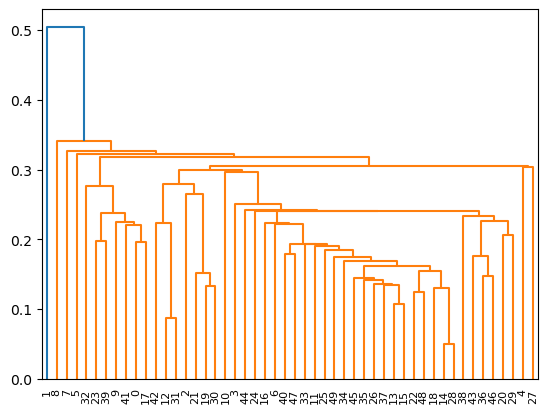

In [9]:
#Hierarchical clustering on crime data using single linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [10]:
#Hierarchial Clustering with just 2 clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')
y_hc1 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
crime['cluster'] = y_hc1
crime.groupby('cluster').agg(['mean']).reset_index()

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\deepa\AppData\Local\Temp\ipykernel_12136\4275067034.py:6: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.742857,168.877551,65.897959,20.757143
1,1,10.000000,263.000000,48.000000,44.500000


In [11]:
#Viewing the data in each cluster
for i in range(2):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Alabama | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming
Total Members: 49

cluster 1
The Members: Alaska
Total Members: 1



In [12]:
#From the above result, it is evident that, this method is not giving proper result. So, we will try a different method for identify best number of clusters
crime = pd.read_csv("C:\\Users\\deepa\\Downloads\\crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])


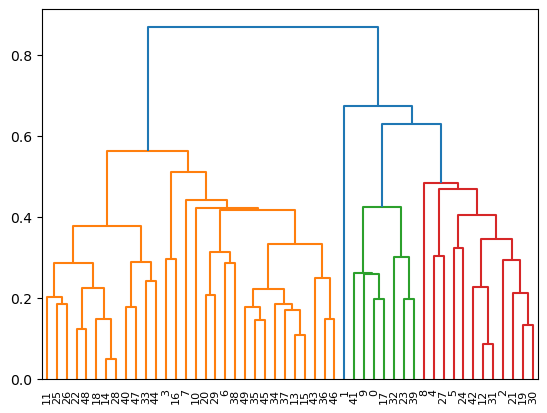

In [13]:
#Hierarchial clustering with average linkage
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [14]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
y_hc2 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
#Creating a new cluster column with the average linkage cluster labels
crime['cluster'] = y_hc2
crime.groupby('cluster').agg(['mean']).reset_index()

C:\Users\deepa\AppData\Local\Temp\ipykernel_12136\4108418509.py:3: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870000,114.433333,63.633333,15.943333
1,1,10.883333,256.916667,78.333333,32.250000
2,2,10.000000,263.000000,48.000000,44.500000
3,3,14.671429,251.285714,54.285714,21.685714


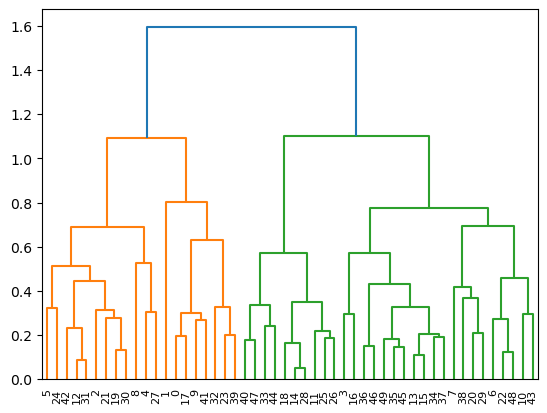

In [17]:
#Hirerachial clustering - complete linkage method
crime = pd.read_csv("C:\\Users\\deepa\\Downloads\\crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [18]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc3 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])
crime['cluster'] = y_hc3
crime.groupby('cluster').agg(['mean']).reset_index()

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\deepa\AppData\Local\Temp\ipykernel_12136\1200992697.py:5: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


In [19]:
#Viewing the values in all the 4 clusters, built using complete linkage method
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Alabama | Alaska | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 8

cluster 1
The Members: Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | Minnesota | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wisconsin | Wyoming
Total Members: 20

cluster 2
The Members: Idaho | Iowa | Maine | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia
Total Members: 10

cluster 3
The Members: Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 12



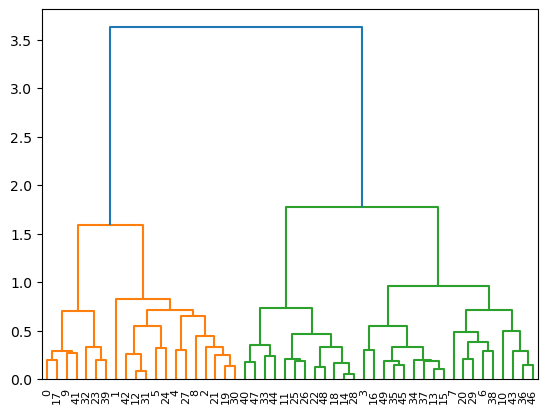

In [20]:
#Ward(centroid) linkage method
crime = pd.read_csv("C:\\Users\\deepa\\Downloads\\crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [21]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc4 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
crime['cluster'] = y_hc4
crime.groupby('cluster').agg(['mean']).reset_index()

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\deepa\AppData\Local\Temp\ipykernel_12136\80001446.py:5: FutureWarning: ['state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('cluster').agg(['mean']).reset_index()


,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


In [23]:
#Viewing the values in all the 4 clusters, built using centroid linkage method
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wyoming
Total Members: 18

cluster 1
The Members: Alaska | Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas
Total Members: 13

cluster 2
The Members: Idaho | Iowa | Maine | Minnesota | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia | Wisconsin
Total Members: 12

cluster 3
The Members: Alabama | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee
Total Members: 7



In [24]:
#Kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
crime1 = pd.read_csv("C:\\Users\\Deepa\\Downloads\\crime_data.csv")
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime1.iloc[:,1:])
df_norm.head()

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

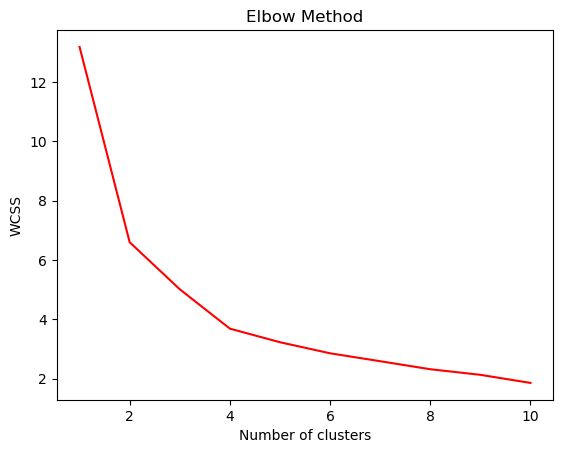

In [25]:
#checking with elbow curve method to finding the best no. of clusters in kmeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#An empty list wcss is created to store the within-cluster sum of squares (WCSS) for each number of clusters.
#A loop is executed from 1 to 10 (inclusive) to fit K-means models with different numbers of clusters.
#he kmeans.inertia_ attribute is used to access the WCSS value for the current model, which represents the sum of squared distances of samples to their closest cluster center.

In [32]:
#Based on elbow method Creating a Kmeans cluster with 4 groups
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [33]:
KM_label=clusters_new.labels_
crime['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [ ]:
crime1

In [ ]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

In [37]:
#DBscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
crime2 = pd.read_csv("C:\\Users\\Deepa\\Downloads\\crime_data.csv")

In [38]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [39]:
df=crime2.iloc[:,1:5]
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [40]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [41]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [42]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [43]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl


,cluster_db
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [46]:
pd.concat([crime2,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [ ]:
s1=(metrics.silhouette_score(df_norm,y_hc1))
s1

In [26]:
#Importing the metrics for calculating silhouette score
s1=(metrics.silhouette_score(df_norm,y_hc1))
s1

0.21033337025958493

In [27]:
s2=(metrics.silhouette_score(df_norm,y_hc2))
s2

0.3699239114027717

In [28]:
s3=(metrics.silhouette_score(df_norm,y_hc3))
s3

0.30607294424263076

In [29]:
s4=(metrics.silhouette_score(df_norm,y_hc4))
s4


0.3298707379986785

In [34]:
s5=(metrics.silhouette_score(df_norm,clusters_new.labels_))
s5

0.3408903560074363

In [49]:
s6=(metrics.silhouette_score(df_norm,cl.cluster_db))
s6

0.21033337025958493

In [50]:
#Consolidating
t={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Single,0.210333
1,Average,0.369924
2,Complete,0.306073
3,Ward,0.329871
4,Kmeans,0.340890
5,DBScan,0.210333


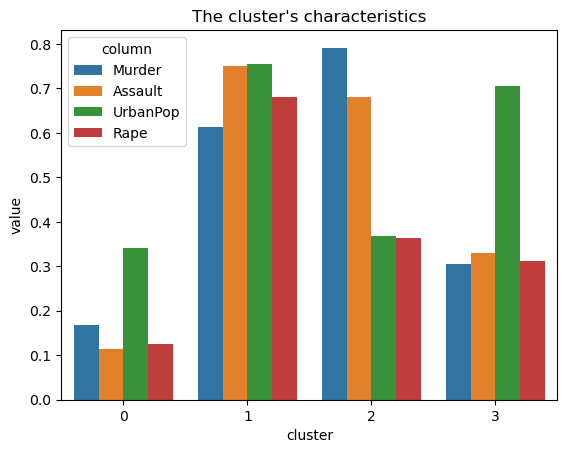

In [52]:
#Visualization
visualize = pd.DataFrame(clusters_new.cluster_centers_)
visualize = visualize.T
visualize['column'] = ['Murder','Assault','UrbanPop','Rape']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
snb.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()


In [53]:
#Cluster3 has high crime & high popultion rate with the kmeans clustering method
#Cluster2 has low crime & low popultion rate with the kmeans clustering method
#Cluster1 has high murder, assault & low popultion rate with the kmeans clustering method
#Cluster0 has low crime & high popultion rate with the kmeans clustering method


In [54]:
#Conclusion
#Four clusters are good to classify the crime rate states.
#From different models and visualizations, it is evident that the hiererachial clustering with average linkage method have the highest silhouette score.
#Higher the silhouette score, more far are the clusters seperated from each other